Conceptos básicos en optimización
===

* 30:00 min | Última modificación: Mayo 19, 2021 | [YouTube]

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

## Definición del problema general de optimización

El problema general de optimización esta compuesto por una función objetivo que se desea maximizar o minimizar:

$$\text{min} f(\mathbf{x})$$

El espacio donde se encuentra el punto óptimo está determinado por un conjunto de restricciones de diferentes tipos:


* Desigualdades lineales:

$$\mathbf{Ax} \le \mathbf{b}$$


* Igualdades lineales:

$$\mathbf{Cx} = \mathbf{d}$$


* Límites en el valor de las variables independientes:

$$ \mathbf{x}_L \le \mathbf{x} \le \mathbf{x}_U$$


* Desigualdades no lineales:

$$ G(\mathbf{x}) \le 0$$


* Igualdades no lineales:

$$ H(\mathbf{x}) \le 0$$


* Restricciones en el tipo de las variables independientes: $x$ puede ser real o estar restringido a los enteros.


## Tipología de funciones

La función objetivo puede ser clasificada de acuerdo con la variación del gradiente de un punto a otro:

* Plana.


* Suave.


* Rugosa.


Respecto a la cantidad de mínimos

* Un único mínimo (global).


* Varios mínimos locales.


* Muchos mínimos locales.

In [2]:
def fig(f, xb, yb, num=100):
    X = np.linspace(start=xb[0], stop=xb[1], num=num)
    Y = np.linspace(start=yb[0], stop=yb[1], num=num)
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)
    fig = plt.figure(figsize=(8, 8))
    ax = fig.gca(projection="3d")
    ax.plot_surface(
        X,
        Y,
        Z,
        cmap=cm.Greys,
        linewidth=1,
        antialiased=False,
        rstride=2,
        cstride=2,
    )
    ax.view_init(45, 35)
    plt.show()

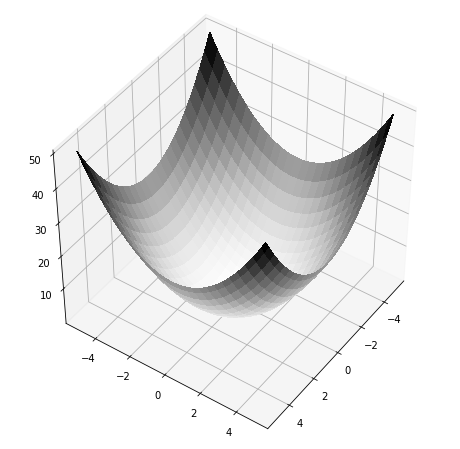

In [3]:
#
# Función suave con un mínimo global
#
fig(
    f=lambda x, y: x ** 2 + y ** 2,
    xb=(-5, 5),
    yb=(-5, 5),
    num=50,
)

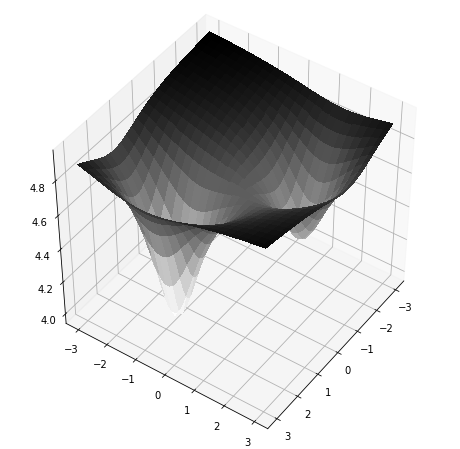

In [4]:
#
# Función suave con varios mínimos locales
#
def f(x, y):
    z1 = (1 + 2 * (x - 1.5) ** 2 + (y + 1.0) ** 2) ** (-1)
    z2 = (1 + (x + 1.0) ** 2 + (y - 1.5) ** 2) ** (-1)
    return -(z1 + 0.6 * z2) + 5


fig(
    f=f,
    xb=(-3, 3),
    yb=(-3, 3),
    num=50,
)

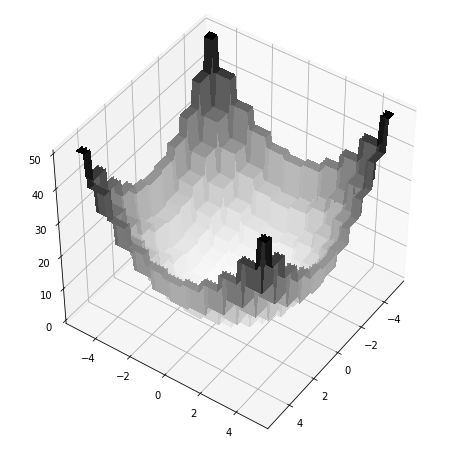

In [5]:
fig(
    f=lambda x, y: np.floor(x + 0.5) ** 2 + np.floor(y + 0.5) ** 2,
    xb=(-5, 5),
    yb=(-5, 5),
)

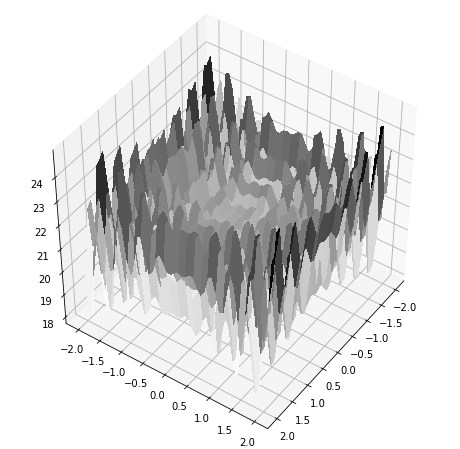

In [6]:
fig(
    f=lambda x, y: 21.5 + x * np.sin(4 * np.pi * x) + y * np.cos(20 * np.pi * y),
    xb=(-2, 2),
    yb=(-2, 2),
    num=50,
)

## Clasificación del problema de optimización

* Por tipo de problema: Sin restricciónes vs con restricciiones.


  
* Por tipo de función objetivo: Lineal vs No lineal.


* Por número de objetivos: Escalar vs Vectorial o multiobjetivo.


* Por tipo de restricciones: Lineal vs No lineal.


* Por tipo de variables: Continuas vs Discretas.

## Tipos de puntos de mínima

**Mínimo fuerte**: El punto $\mathbf{x}^*$ es un mínimo fuerte de $f(\mathbf{x})$, si existe un escalar $\delta > 0$, tal que  $f(\mathbf{x}^*) < f(\mathbf{x}^* + \Delta\mathbf{x})$, para todo $\delta > || \Delta \mathbf{x} || > 0$; es decir, la función siempre crece en la vecindad del mínimo.

**Mínimo global**: El punto $\mathbf{x}^*$ es un mínimo global único de $f(\mathbf{x})$, si $f(\mathbf{x}^*) < f(\mathbf{x}^* + \Delta\mathbf{x})$, para todo $\Delta \mathbf{x} \ne 0$. La función $f(x,y)=x^2 + 2y^2$ tiene un mínimo global único.

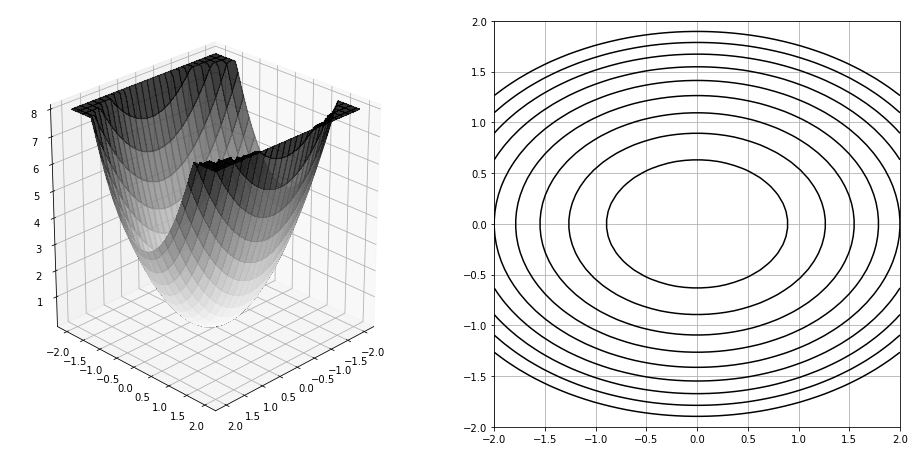

In [7]:
def fig2(f, xb, yb, num=100, maxz=None, levels=12):

    #
    # Malla de puntos
    #
    X = np.linspace(start=xb[0], stop=xb[1], num=num)
    Y = np.linspace(start=yb[0], stop=yb[1], num=num)
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)
    if maxz is not None:
        Z = np.where(Z > maxz, maxz, Z)

    #
    # Figura
    #
    fig = plt.figure(figsize=(16, 8))

    #
    # Panel izquierdo
    #
    ax = fig.add_subplot(1, 2, 1, projection="3d")
    ax.plot_wireframe(
        X,
        Y,
        Z,
        rstride=2,
        cstride=2,
        color="black",
        alpha=0.4,
    )

    ax.plot_surface(
        X,
        Y,
        Z,
        cmap=cm.Greys,
        linewidth=2,
        antialiased=False,
        rstride=2,
        cstride=2,
        alpha=0.8,
    )
    ax.view_init(25, 45)

    #
    # Panel derecho
    #
    ax = fig.add_subplot(1, 2, 2)
    ax.set_aspect("equal", "box")
    ax.contour(X, Y, Z, colors="k", levels=levels)
    ax.grid()


fig2(
    f=lambda x, y: x ** 2 + 2 * y ** 2,
    xb=(-2, 2),
    yb=(-2, 2),
    num=50,
    maxz=8,
)

**Mínimo débil**: El punto $\mathbf{x}^*$ es un mínimo debil de $f(\mathbf{x})$, si $\mathbf{x}^*$ no es un mínimo fuerte, y existe un escalar $\delta > 0$, tal que  $f(\mathbf{x}^*) \le f(\mathbf{x}^* + \Delta\mathbf{x})$, para todo $\delta > || \Delta \mathbf{x} || > 0$; es decir, la función siempre crece en la vecindad del mínimo o no cambia de valor. La función $f(x, y) = x^2(x^2 - 1.5 xy + 2y^2)$ tiene un punto de mínima local débil (todos los puntos sobre la línea $x=0$).

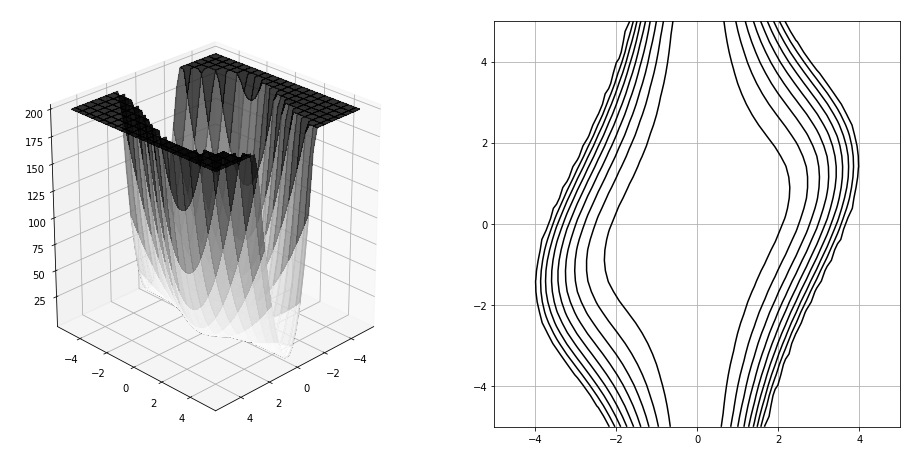

In [8]:
fig2(
    f=lambda x, y: x ** 2 * (x ** 2 - 1.5 * x * y + 2 * y ** 2),
    xb=(-5, 5),
    yb=(-5, 5),
    num=40,
    maxz=200,
)

**Punto de silla**: en una dirección es un mínimo, mientras que en la ortogonal es un máximo. La siguiente función tiene un punto de silla

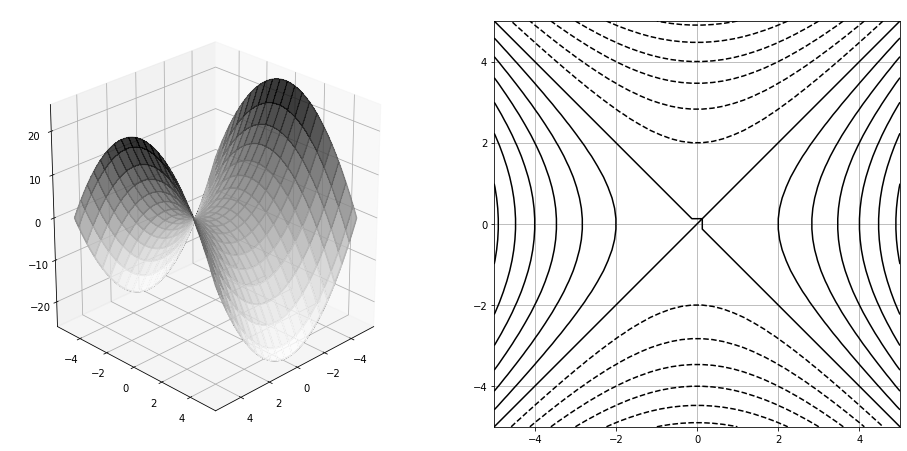

In [9]:
fig2(
    f=lambda x, y: x ** 2 - y ** 2,
    xb=(-5, 5),
    yb=(-5, 5),
    num=40,
    maxz=200,
)

La siguiente función tiene dos puntos de mínima y un punto de silla 

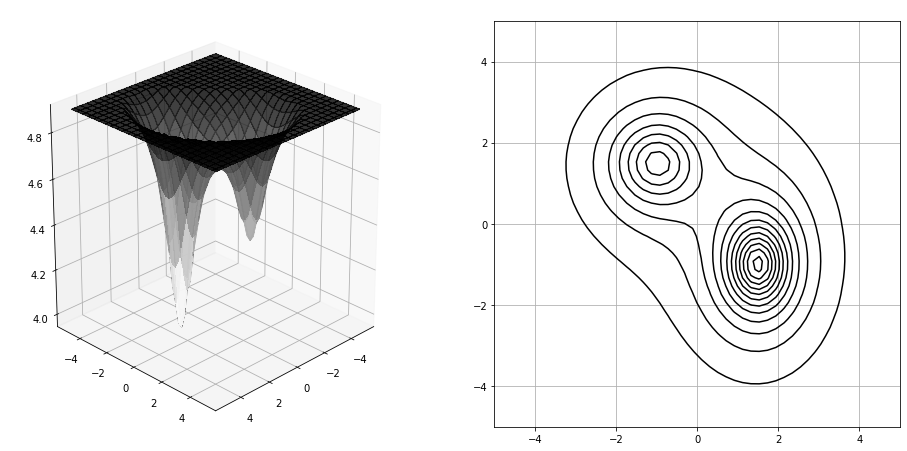

In [10]:
def f(x, y):
    z1 = (1 + 2 * (x - 1.5) ** 2 + (y + 1.0) ** 2) ** (-1)
    z2 = (1 + (x + 1.0) ** 2 + (y - 1.5) ** 2) ** (-1)
    return -(z1 + 0.6 * z2) + 5


fig2(
    f=f,
    xb=(-5, 5),
    yb=(-5, 5),
    num=50,
    maxz=4.9,
)

## Formulación de penalizaciones

Un problema de optimización con restricciones puede convertirse en un problema no restringido formulando una nueva función objetivo penalizada. Las transformaciones son las siguientes:

* Restricción de borde en $a$: 

$$x \ge a \to R(x)=|x-a| + (a - x)$$


* Restricción de igualdad:

$$g(x) = a \to R(x)=|g(x)-a|$$


* Restricción de entero: 

$$R(x) = [\sin(\pi x)]^4 $$


De esta forma, la función objetivo se reescribe como:

$$ F(\mathbf{x}) = f(\mathbf{x}) + \sum_{i=1}^m \delta_i R_i(\mathbf{x})$$

donde se puede hacer $\delta_1 = \cdot \cdot \cdot = \delta_m = \delta$.

## Ejemplo numérico

Encuentre el punto de máxima de la función:

$$f(x, y) = 36 - (x^2 - 1.8)^2 - (y + 0.9)^2$$

Sujeto a: 

* $x$ y $y$ deben ser enteros.

* $-4 \le x, y \le 5$

In [11]:
def f(x, y):
    return 36 - (x ** 2 - 1.8) ** 2 + (y + 0.9) ** 2

El problema anterior no puede ser resuelto directamente usando técnicas basadas en gradiente debido a que la solución solo puede ser encontrada en un espacio restringido y a que las variables independientes solo pueden tomar valores enteros.

En el problema propuesto, se pide maximizar la función

$$f(x, y) = 36 - (x^2 - 1.8)^2 - (y + 0.9)^2$$

Este es equivalente a minimizar la función

$$f^*(x, y) = - f(x, y) = - 36 + (x^2 - 1.8)^2 + (y + 0.9)^2$$

La restricción $x$ y $y$ enteros se puede formular como:

$$R_1(x, y)=[\sin(\pi x)]^4 + [\sin(\pi y)]^4$$

Mientras que la restricción $-4 \le x, y \le 5$ es equivalente a:

$$R_2(x, y)= 
\left\{ 
 \begin{array}{ll}
   |x + 4| + (-4 - x)   & \text{, para $x \ge -4$}\\ 
   + \quad |y + 4| + (-4 - y) & \text{, para $y \ge -4$}\\
   + \quad |x - 5| - (5 - x)  & \text{, para $x \le +5$}\\ 
   + \quad |y - 5| - (5 - y)  & \text{, para $y \le +5$}\\ 
 \end{array}
\right.
$$ 


In [12]:
def F(x, y, delta=10):
    fxy = -f(x, y)  ## función original
    R1 = (abs(np.sin(np.pi * x))) ** 4 + np.abs((np.sin(np.pi * y))) ** 4
    R21 = abs(x + 4) + (-4 - x)
    R22 = abs(y + 4) + (-4 - y)
    R23 = abs(x - 5) - (5 - x)
    R24 = abs(y - 5) - (5 - y)
    return fxy + delta * (R1 + R21 + R22 + R23 + R24)

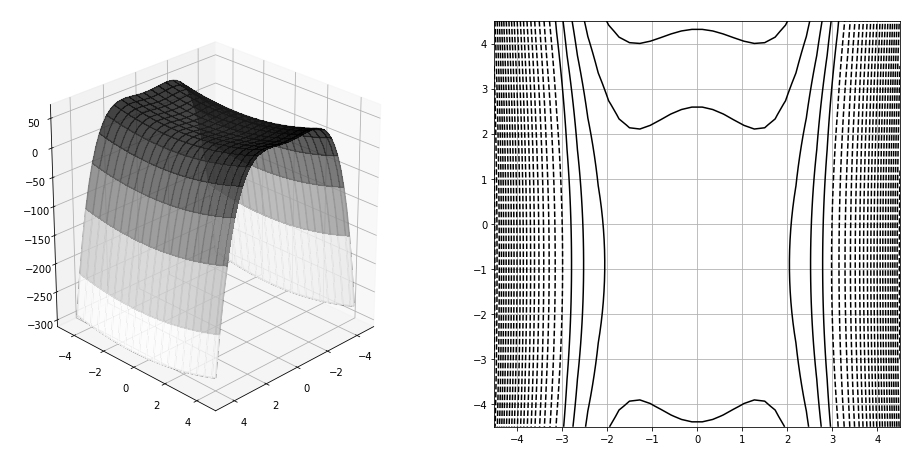

In [13]:
#
# Forma de la función
#
fig2(
    f=f,
    xb=(-4.5, 4.5),
    yb=(-4.5, 4.5),
    num=40,
    maxz=None,
    levels=30,
)

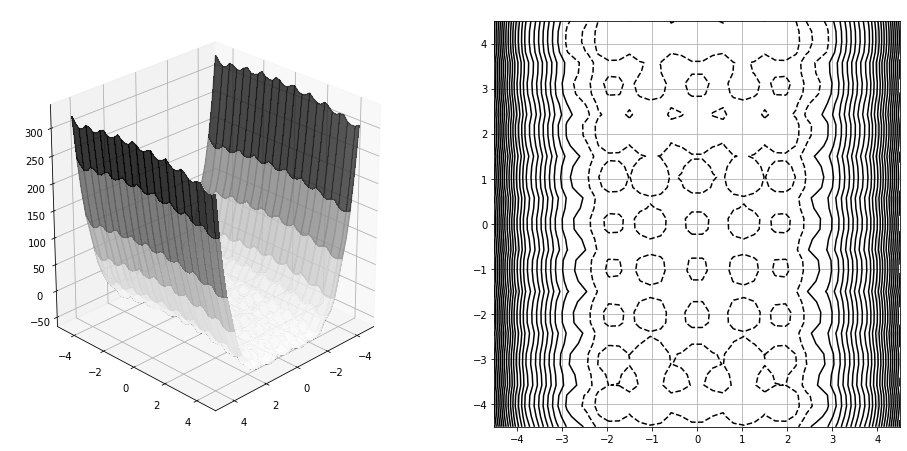

In [14]:
#
# Forma de la función
#
fig2(
    f=F,
    xb=(-4.5, 4.5),
    yb=(-4.5, 4.5),
    num=40,
    maxz=None,
    levels=30,
)